## Exploratory Data Analysis - Amazon Products and Discounts 2023

#### Problem Statement:
- Perform Data Cleaning and Exploratory Data Analysis (EDA).
- Identify patterns and trends in the data.
- Explore the relationships between variables.


#### Dataset description

This is a Product Sales Dataset scraped from the Amazon website.

##### Features:
- name : The name of the product
- main_category : The main category of the product 
- sub_category : The sub category of the product 
- image : The image of the product 
- link : The amazon website reference link of the product
- ratings : The ratings given by amazon customers to the product
- no of ratings : The number of ratings given to this product in amazon shopping
- discount_price : The discount prices of the product
- actual_price : The actual MRP of the product

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
amazon = pd.read_csv("Amazon-Products.csv")

In [71]:
amazon.shape

(551585, 10)

In [72]:
amazon.head(3)

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"


In [73]:
#Dropping unnecessary columns

amazon.drop(["Unnamed: 0","image","link"], axis=1, inplace=True)

In [74]:
amazon.head(3)

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,"1,206","₹34,490","₹61,990"


In [75]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            551585 non-null  object
 1   main_category   551585 non-null  object
 2   sub_category    551585 non-null  object
 3   ratings         375791 non-null  object
 4   no_of_ratings   375791 non-null  object
 5   discount_price  490422 non-null  object
 6   actual_price    533772 non-null  object
dtypes: object(7)
memory usage: 29.5+ MB


The columns "ratings", "no_of_ratings", "discount_price" and "actual_price" have datatype "object". We need to change it to Integer or Float.

Before that let us deal with the missing values

### Handling Missing Values

In [76]:
amazon.isnull().sum()

name                   0
main_category          0
sub_category           0
ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64

In [77]:
#Dropping "actual_price" rows having missing values
#Note- we cannot use dropna() method as the datatype of this column is "object" which will be corrected later in our code

index = amazon[amazon.actual_price.isnull()].index
amazon.drop(index, axis=0, inplace=True)

In [78]:
#rechecking remaining missing values
amazon.isnull().sum()

name                   0
main_category          0
sub_category           0
ratings           164742
no_of_ratings     164742
discount_price     43350
actual_price           0
dtype: int64

In [79]:
#Assuming there are zero discount on products where "discount_price" values are missing, let us replace them with "actual_price"

amazon[amazon.discount_price.isnull()]

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
126,"Hitachi 1.5 Ton 5 Star Window AC (Copper, Dust...",appliances,Air Conditioners,2.7,10,NaN,"₹49,300"
137,"Portable Air Conditioner,Office Air Conditione...",appliances,Air Conditioners,3.2,303,NaN,"₹7,250"
207,Voltas 1.5 Ton 3 Star Window AC (Copper 183CYA...,appliances,Air Conditioners,4.1,"1,832",NaN,"₹31,750"
212,"FANCISUN Portable Air Conditioner,Personal Air...",appliances,Air Conditioners,NaN,NaN,NaN,"₹8,980"
213,"BENBOAR Portable Air Conditioner Fan, Desktop ...",appliances,Air Conditioners,3.3,24,NaN,"₹4,969"
...,...,...,...,...,...,...,...
551526,"Nivia 2434 Polyester Women Jacket, X-Large (Tu...",sports & fitness,Yoga,5.0,2,NaN,"₹1,433"
551535,"Nivia 2367-3 Hydra-2 Polyester Training Tee, A...",sports & fitness,Yoga,4.0,8,NaN,₹680
551536,"Nivia 2365-3 Hydra-1 Polyester Training Tee, A...",sports & fitness,Yoga,3.2,7,NaN,₹507
551542,Adidas Men's Flat,sports & fitness,Yoga,NaN,NaN,NaN,"₹2,699"


In [80]:
#Replacing NaN with "actual_price"
rows = amazon[amazon.discount_price.isnull()].index

for i in rows:
    amazon.loc[i]["discount_price"] = amazon.loc[i]["actual_price"]

In [81]:
#recheking null values
amazon.isnull().sum()

name                   0
main_category          0
sub_category           0
ratings           164742
no_of_ratings     164742
discount_price         0
actual_price           0
dtype: int64

In [82]:
#Rows where ratings and no_of_ratings both values are missing
amazon[amazon.ratings.isnull() & amazon.no_of_ratings.isnull()]

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
24,Lloyd 1.5 Ton 3 Star Fixed Speed Window Ac (Co...,appliances,Air Conditioners,NaN,NaN,"₹27,440","₹47,990"
50,Samsung 1 Ton 5 Star Inverter Split AC (Copper...,appliances,Air Conditioners,NaN,NaN,"₹36,999","₹57,990"
57,Haier 1.5 Ton 3 Star Frost Self Clean Inverter...,appliances,Air Conditioners,NaN,NaN,"₹32,990","₹64,000"
69,Lloyd 2.0 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,NaN,NaN,"₹46,000","₹77,990"
73,"Voltas 1.5 Ton 3 Star, Fixed Speed Window AC (...",appliances,Air Conditioners,NaN,NaN,"₹29,990","₹42,990"
...,...,...,...,...,...,...,...
551543,Puma Women Sweatshirt,sports & fitness,Yoga,NaN,NaN,"₹1,889","₹3,999"
551569,Amazon Brand - Symactive Men's Activewear Gym ...,sports & fitness,Yoga,NaN,NaN,₹699,"₹2,199"
551574,Just rider Arm Sleeves UV Protection for Drivi...,sports & fitness,Yoga,NaN,NaN,₹219,₹699
551577,"Obsessions Reversible Printed Yoga Mat,Anti-Sl...",sports & fitness,Yoga,NaN,NaN,"₹1,320","₹1,650"


In [83]:
#There are lot of rows with NaN so we shall not drop these, intead Replacing null values in "ratings" and "no_of_ratings" with 0

amazon.ratings.fillna(0, inplace=True)
amazon.no_of_ratings.fillna(0, inplace=True)

In [84]:
amazon.isnull().sum()

name              0
main_category     0
sub_category      0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

There are no missing values now!

### Checking Duplicates

In [85]:
#Checking for Duplicates
amazon.duplicated().sum()

32355

In [126]:
amazon[amazon.duplicated()]

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,Discount,Discount_Percentage(%),Manufacture
3281,Portable Mini Air Conditioner Small Size 500Ml...,appliances,All Appliances,0.0,0.0,1499.0,2599.0,1100.0,42.32,Portable
3476,Geek Aire CF1SL Rechargeable 13” Inch Portable...,appliances,All Appliances,0.0,0.0,6999.0,9099.0,2100.0,23.08,Geek
5089,REXERA Personal Air Conditioner Arctic Air Con...,appliances,All Appliances,0.0,0.0,1499.0,2500.0,1001.0,40.04,REXERA
6848,Crompton Instaserve 1200 W Induction Cooktop w...,appliances,All Appliances,0.0,0.0,2219.0,3200.0,981.0,30.66,Crompton
7025,Luminous UPS Sine Eco Volt Neo 1250 Inverter f...,appliances,All Appliances,0.0,0.0,7195.0,9750.0,2555.0,26.21,Luminous
...,...,...,...,...,...,...,...,...,...,...
528707,VORGETA Analog Stainless Steel Strap with Dial...,accessories,Watches,0.0,0.0,249.0,599.0,350.0,58.43,VORGETA
549179,IndiWeaves® Girls Super Soft Regular Fit Cotto...,stores,Women's Fashion,0.0,0.0,1044.0,1699.0,655.0,38.55,IndiWeaves®
549459,IndiWeaves® Girls Super Soft Regular Fit Cotto...,stores,Women's Fashion,0.0,0.0,1044.0,1599.0,555.0,34.71,IndiWeaves®
549481,IndiWeaves® Girls Super Soft Regular Fit Cotto...,stores,Women's Fashion,0.0,0.0,934.0,1499.0,565.0,37.69,IndiWeaves®


In [87]:
#dropping duplicates

amazon.drop_duplicates(inplace=True)

In [88]:
amazon.shape

(501417, 7)

### Cleaning data in columns "no_of_ratings", "discount_price"	and "actual_price" by removing "," and "₹" sign and non-numeric values

In [89]:
amazon.replace([",","₹"],"", regex= True, inplace= True)

In [90]:
amazon.head(2)

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,2255,32999,58990
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,2948,46490,75990


There are some string data in "ratings" and "no_of_ratings" columns, lets also replace these values

In [91]:
amazon.ratings.unique()

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', 0, '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '3.2', '4.8', '4.7', '2.5', '1.0', '2.6', '2.8', '1.7',
       'Get', '1.8', '2.4', '4.9', '2.2', '1.6', '1.9', '2.3', '2.0',
       '1.4', '2.1', 'FREE', '1.2', '1.3', '1.5', '68.99', '65', '1.1',
       '70', '100', '99', '2.99'], dtype=object)

There are two string values "FREE" and "Get" and values that does not fall between 0-5.

We shall replace "Get" and "FREE" with "0" and drop values which are not between 0-5.

In [92]:
#replacing 'Get' and 'FREE' value to "0"
amazon["ratings"].replace(["Get","FREE"],"0",inplace= True)

In [93]:
#Dropping rows having value 2.99
index2 = amazon[amazon.ratings == '2.99' ].index
amazon.drop(index2,axis=0, inplace = True)

In [94]:
#Similarly dropping all the ambiguous ratings rows 
amazon.drop((amazon[amazon.ratings == '68.99' ].index), axis=0, inplace = True)
amazon.drop((amazon[amazon.ratings == '65' ].index), axis=0, inplace = True)
amazon.drop((amazon[amazon.ratings == '70' ].index), axis=0, inplace = True)
amazon.drop((amazon[amazon.ratings == '100' ].index), axis=0, inplace = True)
amazon.drop((amazon[amazon.ratings == '99' ].index), axis=0, inplace = True)

In [95]:
amazon.ratings.unique()

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', 0, '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '3.2', '4.8', '4.7', '2.5', '1.0', '2.6', '2.8', '1.7', '0',
       '1.8', '2.4', '4.9', '2.2', '1.6', '1.9', '2.3', '2.0', '1.4',
       '2.1', '1.2', '1.3', '1.5', '1.1'], dtype=object)

Discrepancies in "ratings" column has now been resolved !

In [96]:
amazon.no_of_ratings.unique()

array(['2255', '2948', '1206', ..., '3329', '7141', '4406'], dtype=object)

In [97]:
#replacing string values in "no_of_ratings" to "0"
amazon["no_of_ratings"].replace(["Only 2 left in stock.",'Only 1 left in stock.','FREE Delivery by Amazon', 
                                 'Usually dispatched in 2 to 3 days.','Usually dispatched in 5 to 6 days.', 
                                 'Usually dispatched in 4 to 5 days.','Usually dispatched in 6 to 7 days.',
                                 'Usually dispatched in 7 to 8 days.','Only 3 left in stock.','Usually dispatched in 3 to 4 weeks.',
                                 'Usually dispatched in 4 to 5 weeks.','Only 5 left in stock.','Only 4 left in stock.',
                                 'Usually dispatched in 3 to 5 days.','Usually dispatched in 11 to 12 days.',
                                 'Usually dispatched in 9 to 10 days.','Usually dispatched in 2 to 3 weeks.',
                                 'Usually dispatched in 8 to 9 days.','Usually dispatched in 1 to 2 months.',
                                 'This item will be released on August 14 2023.']
                                 , "0",inplace= True)

Discrepancies in "no_of_ratings" column has been resolved !

### Changing datatypes for columns "ratings", "no_of_ratings", "discount_price" and "actual_price"

In [98]:
amazon[["ratings","no_of_ratings","discount_price","actual_price"]] = amazon[
    ["ratings","no_of_ratings","discount_price","actual_price"]].astype('float')

In [99]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501393 entries, 0 to 551584
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            501393 non-null  object 
 1   main_category   501393 non-null  object 
 2   sub_category    501393 non-null  object 
 3   ratings         501393 non-null  float64
 4   no_of_ratings   501393 non-null  float64
 5   discount_price  501393 non-null  float64
 6   actual_price    501393 non-null  float64
dtypes: float64(4), object(3)
memory usage: 30.6+ MB


In [100]:
amazon.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,2255.0,32999.0,58990.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,2948.0,46490.0,75990.0
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,1206.0,34490.0,61990.0
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69.0,37990.0,68990.0
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630.0,34490.0,67790.0


#### Our dataset is now clean and ready for further analysis !!

### Creating Discount and Discount_percentage column

In [101]:
#Creating column for Discount amount

amazon["Discount"] = amazon["actual_price"] - amazon["discount_price"]

In [102]:
#Creating column for Discount Percentage

amazon["Discount_Percentage(%)"] = round((amazon["Discount"]/amazon["actual_price"])*100,2)

In [103]:
#Randomly checking 5 rows
amazon.sample(5)

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,Discount,Discount_Percentage(%)
407167,Second Vision® Hidden Mini Spy Camera with Aud...,tv audio & cameras,Security Cameras,1.2,5.0,1999.0,3199.0,1200.0,37.51
331336,Kidsville Boy's Boxer Shorts (MC018_Multicolor...,kids' fashion,Kids' Clothing,4.0,1.0,398.0,1899.0,1501.0,79.04
6728,HAVAI ABS Plastic Cooler Fan Blade Clockwise (...,appliances,All Appliances,3.6,74.0,599.0,799.0,200.0,25.03
503754,FACE GUARD Leather Reusable Face Mask 4 Layer ...,bags & luggage,Travel Accessories,3.8,86.0,219.0,499.0,280.0,56.11
281581,ldhsati Fashion Men's Cotton Thermal Set Fleec...,men's clothing,Innerwear,5.0,1.0,499.0,999.0,500.0,50.05


### Extracting Manufacturer name 

In [104]:
amazon["Manufacture"] = amazon.name.str.split(" ").str[0]

In [105]:
amazon.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,Discount,Discount_Percentage(%),Manufacture
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,2255.0,32999.0,58990.0,25991.0,44.06,Lloyd
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,2948.0,46490.0,75990.0,29500.0,38.82,LG
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,1206.0,34490.0,61990.0,27500.0,44.36,LG
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69.0,37990.0,68990.0,31000.0,44.93,LG
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630.0,34490.0,67790.0,33300.0,49.12,Carrier


### EDA

### Top 10 Manufacturers on Amazon

In [106]:
amazon.Manufacture.value_counts(ascending=False).head(15) #top 15 manufacturers

PC         5376
Puma       4558
Shopnet    4227
Amazon     3474
U.S.       2847
The        2847
Nike       2812
NEUTRON    2762
Men's      2591
Van        2589
Campus     2318
Red        2292
Jockey     2235
Adidas     1895
Avsar      1830
Name: Manufacture, dtype: int64

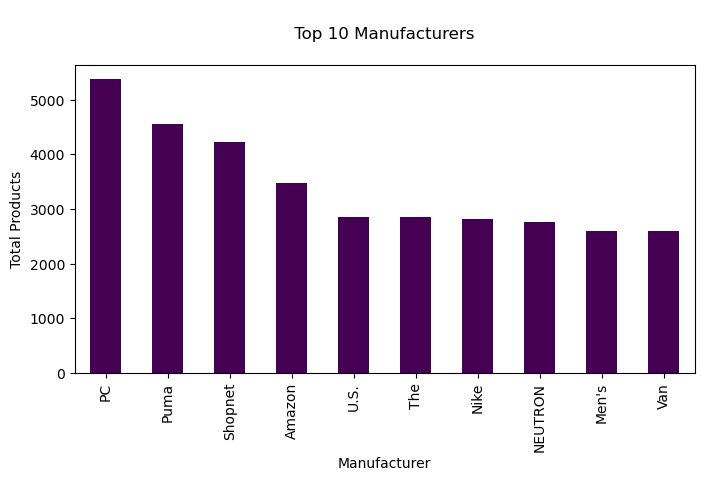

In [107]:
plt.figure(figsize=(8,4))
(amazon.Manufacture.value_counts(ascending=False).head(10)).plot(kind="bar", xlabel="Manufacturer", ylabel="Total Products", colormap = 'viridis')
plt.title("\n Top 10 Manufacturers \n")
plt.show()

PC, Puma, Shopnet and Amazon are top manufacturers of Amazon website with more than 3000 different products !

### Top 10 Categories on Amazon

In [109]:
amazon.main_category.value_counts(ascending=False).head(15) #top 15 products

accessories             104902
women's clothing         73805
tv audio & cameras       64061
men's clothing           62604
men's shoes              51424
appliances               30094
stores                   28745
home & kitchen           14138
kids' fashion            12224
sports & fitness         12139
bags & luggage            9711
beauty & health           9680
car & motorbike           6968
toys & baby products      5904
women's shoes             5108
Name: main_category, dtype: int64

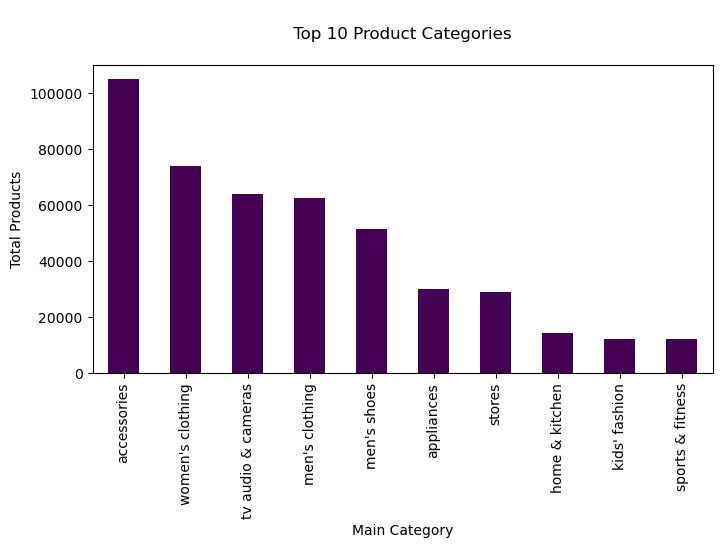

In [110]:
plt.figure(figsize=(8,4))
(amazon.main_category.value_counts(ascending=False).head(10)).plot(kind="bar", xlabel="Main Category",ylabel="Total Products", colormap = 'viridis')
plt.title("\n Top 10 Product Categories \n")
plt.show()

- There are more than 1,00,000 products under the Top category "accessories"
- "women's clothing" is the second largest category with more than 70,000 products.
- "mens clothing" and "tv audio & cameras" are also among the top cateories with more than 60,000 products.

### Top 10 Product Sub-Categories on Amazon

In [111]:
amazon.sub_category.value_counts(ascending=False).head(10)

Jewellery                     18649
Western Wear                  18576
Clothing                      18479
Ethnic Wear                   18393
Lingerie & Nightwear          18357
Fashion & Silver Jewellery    18242
Handbags & Clutches           18068
Sports Shoes                  18044
Watches                       18043
Bags & Luggage                17854
Name: sub_category, dtype: int64

Jewellery, Western Wear, Clothing and Ethnic Wear are top sub_categories with more than 18k products

### Top Rated Brands

In [112]:
#filtering data to include ratings=5
toprating = amazon[amazon.ratings == 5.0]
toprating.head(3)

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,Discount,Discount_Percentage(%),Manufacture
58,Hitachi Split Ac - 1.5 Ton Kiyora 5200Fx I Fre...,appliances,Air Conditioners,5.0,1.0,42240.0,71900.0,29660.0,41.25,Hitachi
89,Panasonic 2 Ton 5 Star Wi-Fi Inverter Smart Sp...,appliances,Air Conditioners,5.0,1.0,66990.0,87900.0,20910.0,23.79,Panasonic
97,Panasonic 1.5 Ton 3 Star Hot and Cold Wi-Fi In...,appliances,Air Conditioners,5.0,2.0,43990.0,61400.0,17410.0,28.36,Panasonic


In [113]:
toprating.Manufacture.value_counts().head(10)

Nike      361
Puma      306
The       242
U.S.      218
Van       206
Peter     162
Max       152
Jockey    148
Jack      145
Baggit    140
Name: Manufacture, dtype: int64

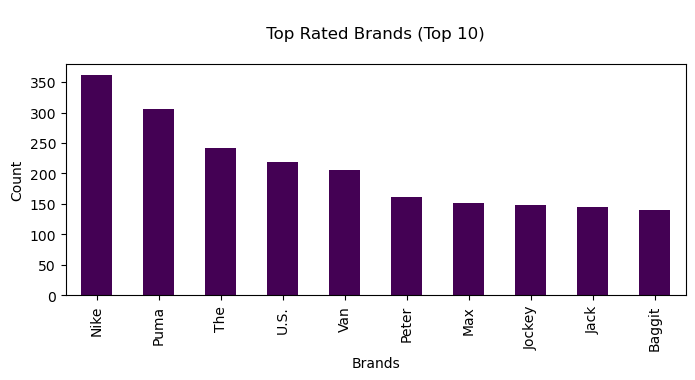

In [114]:
toprating.Manufacture.value_counts().head(10).plot(kind="bar",figsize=(8,3), xlabel="Brands",ylabel="Count", colormap = 'viridis')
plt.title("\n Top Rated Brands (Top 10) \n")
plt.show()

- "Nike" and "Puma" are Top rated brands on Amazon with more than 300 5star ratings.
- "U.S.Polo" and "Van Heusen" are also among top rated brands and have received around 250 5star ratings.

### Top Rated Categories and Sub Categories

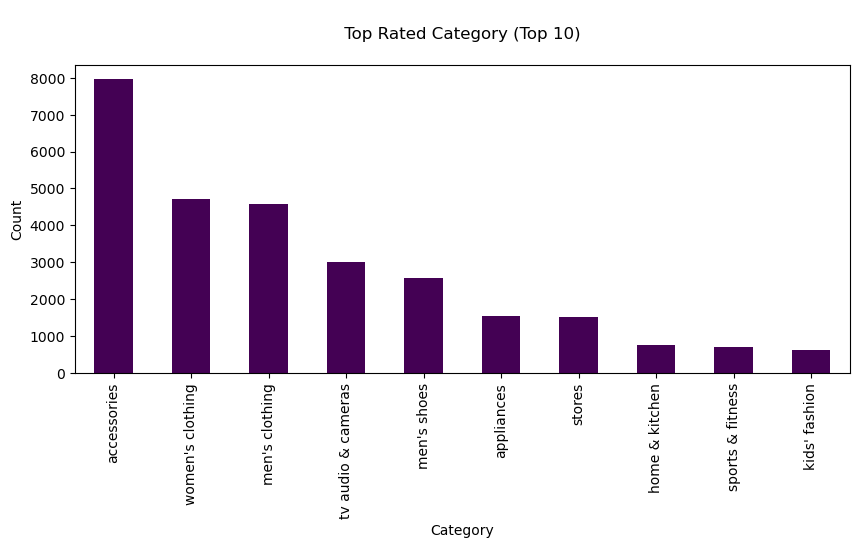

In [116]:
toprating.main_category.value_counts().head(10).plot(kind="bar",figsize=(10,4), xlabel="Category",ylabel="Count", colormap = 'viridis')
plt.title("\n Top Rated Category (Top 10) \n")
plt.show()

- "accesories" is the top rated category with around 8000 5star ratings
- "women's clothing" and "men's clothing" are next top rated categories and have received around 5000 5star ratings 

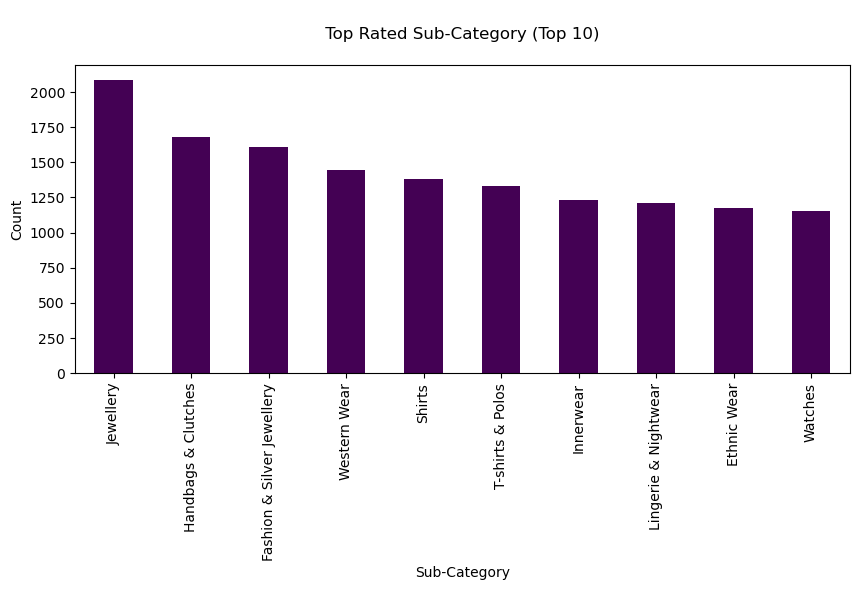

In [118]:
toprating.sub_category.value_counts().head(10).plot(kind="bar",figsize=(10,4), xlabel="Sub-Category", ylabel="Count", colormap = 'viridis')
plt.title("\n Top Rated Sub-Category (Top 10) \n")
plt.show()

Sub-category wise, "Jewellery" has received maximum 5star ratings followed by "Handbags & Clutches"

### Total No. of Ratings

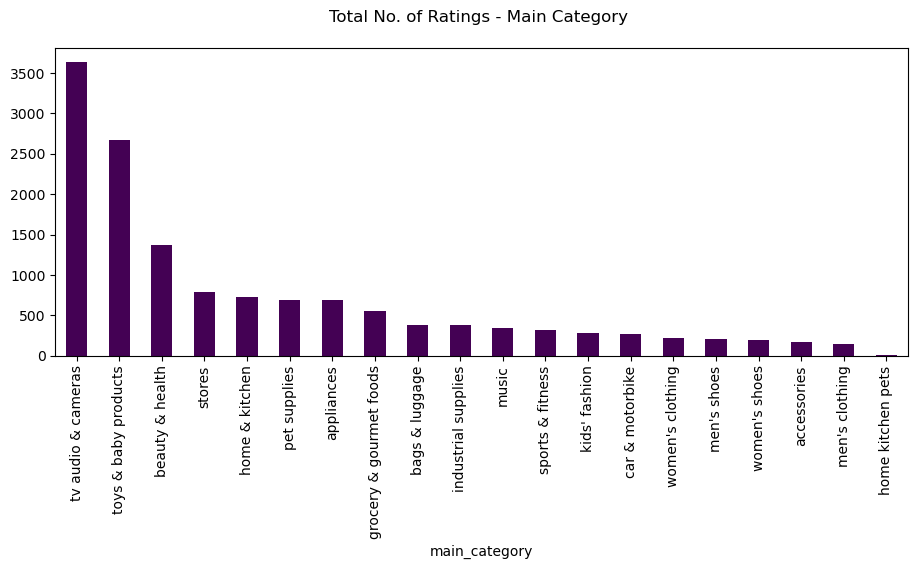

In [120]:
df = amazon[amazon.no_of_ratings != 0.0 ] #Excluding '0' values

df.groupby("main_category")['no_of_ratings'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(11,4),colormap = 'viridis')
plt.title("Total No. of Ratings - Main Category \n")
plt.ylabel=("Total Ratings")
plt.show()

"Tv audio & camera" and "toys & baby products" categories have received maximum number of ratings from customer. It shows interest of customer on these product categories

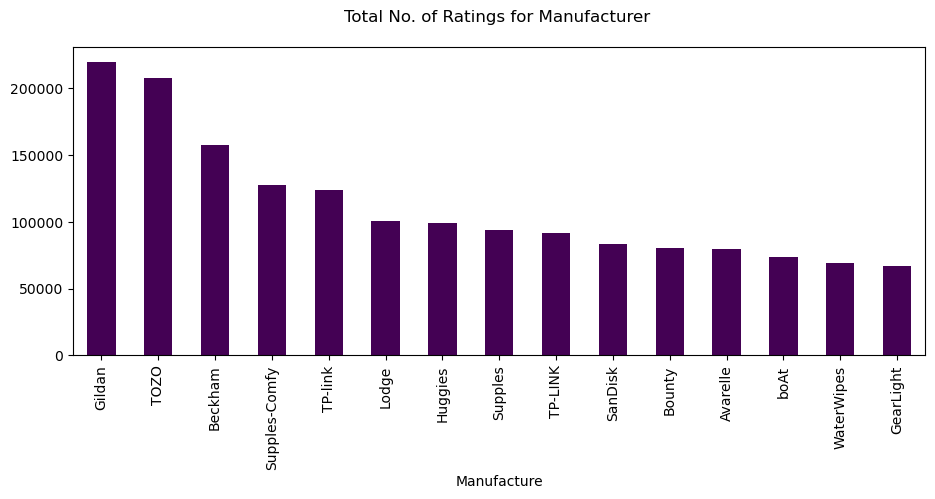

In [121]:
df.groupby("Manufacture")['no_of_ratings'].mean().sort_values(ascending=False).head(15).plot(kind='bar',figsize=(11,4),colormap = 'viridis')
plt.title("Total No. of Ratings for Manufacturer \n")
plt.ylabel=("Total Ratings")
plt.show()

Gildan and TOZO brands have received highest number of ratings from customers

### Highest and Lowest Discounted Products Sub Categories

In [122]:
#Highest Discounted categories
amazon.groupby(["main_category"])["Discount_Percentage(%)"].mean().sort_values(ascending=False).head(10)

main_category
women's clothing      56.586502
accessories           50.834414
tv audio & cameras    46.801304
bags & luggage        45.818756
home & kitchen        45.769559
sports & fitness      44.503817
kids' fashion         43.973170
car & motorbike       43.398568
men's clothing        41.367156
stores                40.269578
Name: Discount_Percentage(%), dtype: float64

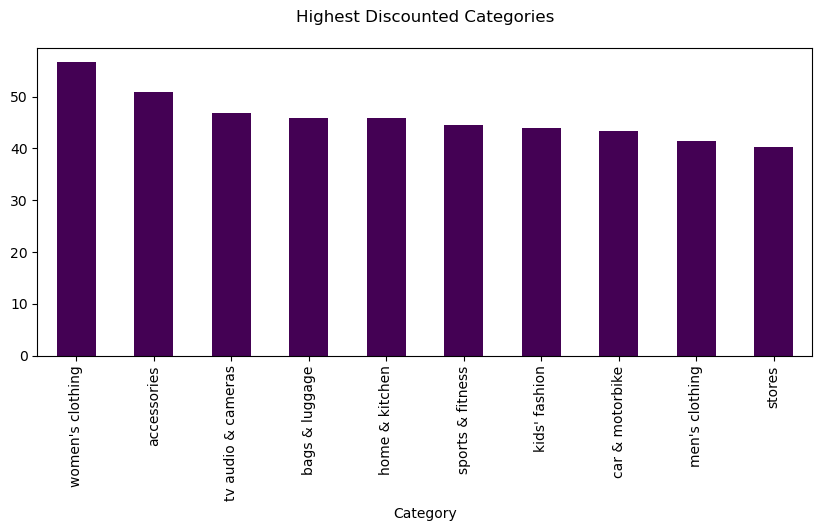

In [123]:
plt.figure(figsize=(10,4))
amazon.groupby(["main_category"])["Discount_Percentage(%)"].mean().sort_values(ascending=False).head(10).plot(kind= 'bar',cmap='viridis')
plt.xlabel("Category")
plt.title("Highest Discounted Categories\n")
plt.show()

"women's clothing" has had highest discounts in 2023 followed by "accessories". These may be due to stock clearance.

In [124]:
#Lowest Discounted categories
amazon.groupby(["main_category"])["Discount_Percentage(%)"].mean().sort_values().head(10)

main_category
home kitchen pets          17.232941
grocery & gourmet foods    18.285859
pet supplies               31.398255
beauty & health            31.644661
toys & baby products       34.670547
men's shoes                36.342124
music                      37.342688
appliances                 38.126839
industrial supplies        38.457003
women's shoes              39.159115
Name: Discount_Percentage(%), dtype: float64

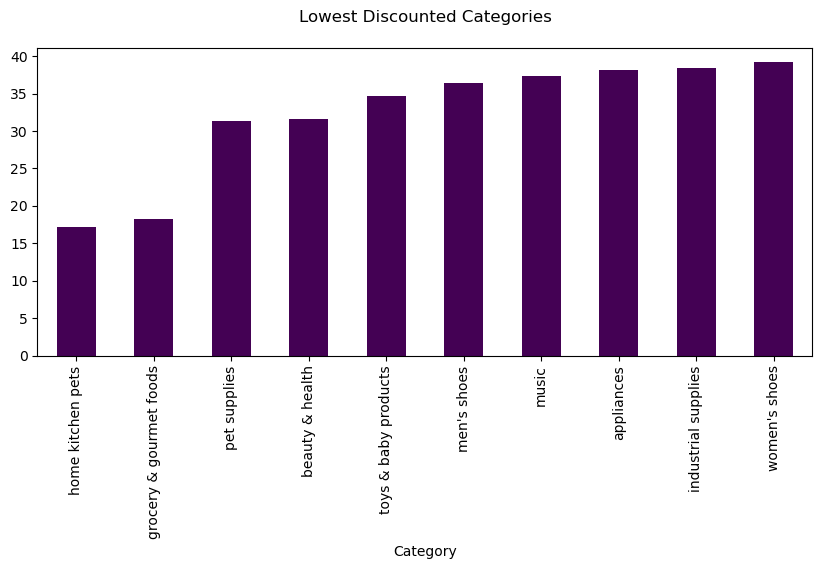

In [125]:
plt.figure(figsize=(10,4))
amazon.groupby(["main_category"])["Discount_Percentage(%)"].mean().sort_values().head(10).plot(kind= 'bar',cmap='viridis')
plt.xlabel("Category")
plt.title("Lowest Discounted Categories\n")
plt.show()

The lowest discounts are on "home kitchen pets" and "grocery & gourmey foods" products

### Conclusion:

In this project, we conducted Exploratory Data Analysis (EDA) on a large dataset of Amazon products and discounts for the year 2023. The dataset was initially messy, containing missing values, incorrect data types, and various anomalies. Through a systematic data cleaning process, we successfully prepared the data for analysis, ensuring its quality and reliability.

Our analysis revealed several key insights and findings:

- Top Manufacturers and Categories: We identified the top manufacturers on Amazon, with "PC" and "Puma" leading the way. In terms of product categories, "accessories" had the highest number of products, followed by "women's clothing" and "tv audio & cameras."

- Top Rated Brands and Categories: We found that "Nike" and "Puma" were the top-rated brands on Amazon, each receiving over 300 5-star ratings. Among categories, "accessories" received the most 5-star ratings, indicating high customer satisfaction.

- Total Number of Ratings: "Tv audio & camera" and "toys & baby products" categories received the most ratings from customers, suggesting a high level of interest and engagement in these product categories.

- Discount Analysis: We analyzed discounts across various categories and sub-categories. "Women's clothing" had the highest average discount percentage, followed by "accessories." On the other hand, "home kitchen pets" and "grocery & gourmet foods" had the lowest average discount percentages, possibly due to the nature of these products.

In conclusion, this EDA project has provided valuable insights into Amazon's product offerings and customer interactions in 2023. The cleaned and analyzed dataset can serve as a foundation for further in-depth analyses, such as price forecasting, customer segmentation, and recommendation systems, to help businesses make data-driven decisions and enhance their competitiveness on the Amazon platform. The findings also highlight the importance of understanding customer preferences and optimizing pricing strategies in the highly competitive e-commerce market.




